# Day 3 Project Challenge - Chipseq data & functions

Find the original Notebook with detailed instructions by **Daniel Pass** [here](https://github.com/passdan/PracticalPythonProgrammingForBiologists/blob/main/Day3/P34B-Day3-Project-ChipSeq.ipynb).

Find the input file [here](/inputData/Day3-project-binding_data.sgr).

> In this exercise, we will explore a CHIPseq binding site dataset consisting of three wild-type (WT) samples and three knockout (KO) samples. The dataset contains abundance traces of binding sites, which represent the level of binding intensity for each genomic region. By examining the differences in binding site abundance, we can gain insights into the impact of the knockout on the binding patterns and potentially identify key regulatory elements affected by the knockout.
>
> The objective of this exercise is to analyze and compare the abundance traces between the WT and KO samples. We are going to be repeating steps so putting your code into functions will be really helpful (although technically not essential). And we will start by reading in a bespoke dataset from a file.
>
> We have three columns. Sample ID, a genomic coordinate (distance from our site of interest) and an abundance. While we are talking here about CHiPSeq the data format could apply to any set of x/y coordinates.

SAMPLE WT01
    Coord of max abundance	-0.9090909090909101
    Max abundance		0.9598840840957631


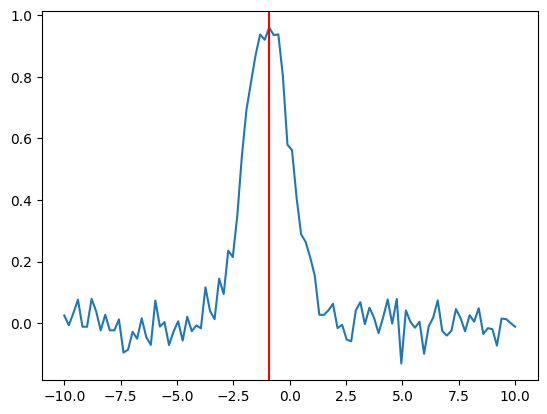

SAMPLE WT02
    Coord of max abundance	0.7070707070707076
    Max abundance		0.9971393345354964


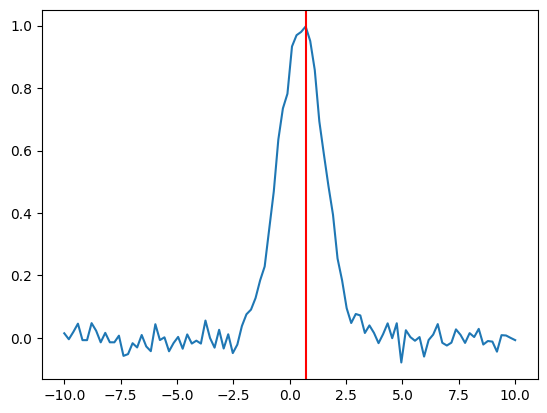

SAMPLE WT03
    Coord of max abundance	-0.5050505050505052
    Max abundance		1.042004627841168


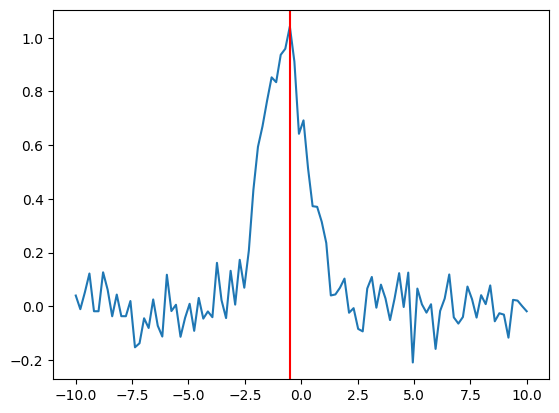

SAMPLE KO01
    Coord of max abundance	4.3434343434343425
    Max abundance		1.4810444796005102


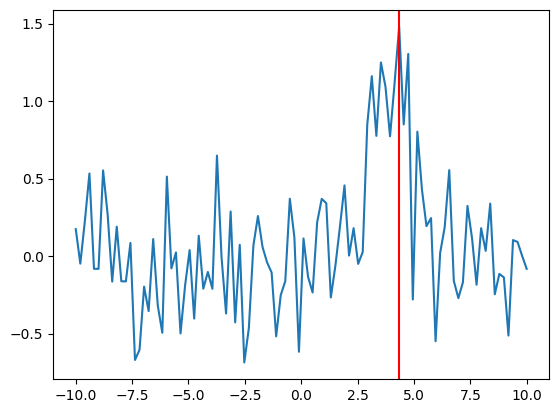

SAMPLE KO02
    Coord of max abundance	0.9090909090909083
    Max abundance		1.1568575396439709


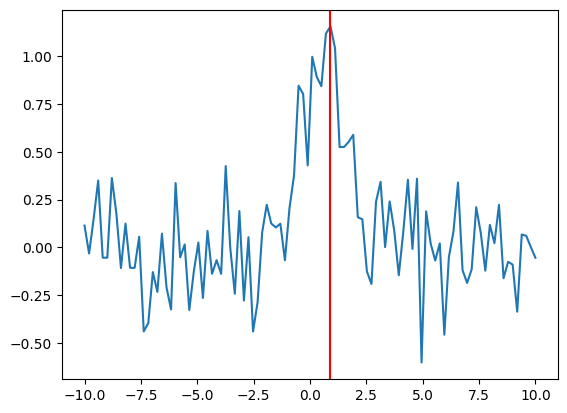

SAMPLE KO03
    Coord of max abundance	6.565656565656564
    Max abundance		1.0738418069231421


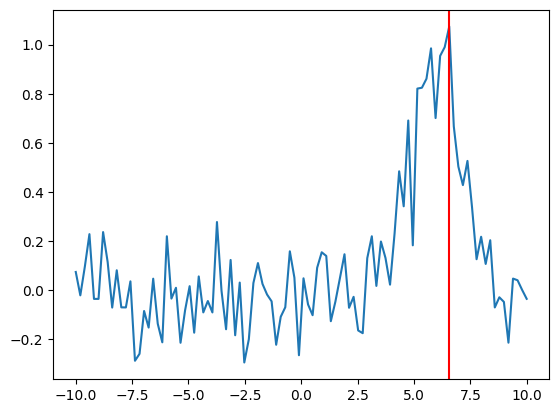

In [2]:
import matplotlib.pyplot as plt

# Read in the data file to create a dictionary
data_dict = {}

with open("inputData/Day3-project-binding_data.sgr") as inputFile:
  for line in inputFile.readlines():
    sample,coord,abund = line.strip().split("\t")

    if sample not in data_dict:
      data_dict[sample] = [[float(coord),float(abund)]]
    else:
      data_dict[sample].append([float(coord),float(abund)])

# Create a function to find and return the position of the highest abundance
def find_peak(dataset):
  max_coord = 0
  max_abund = 0

  for coord,abund in dataset:
    if abund > max_abund:
      max_abund = abund
      max_coord = coord

  return max_coord, max_abund

# Create a function to plot the data for a sample
def plot_abundance(dataset):

  x = []
  y = []

  for coord,abund in dataset:
    x.append(coord)
    y.append(abund)

  max_coord, max_abund = find_peak(dataset)

  plt.plot(x, y)
  plt.axvline(max_coord, color = 'r')
  plt.show()

# Print results for every sample
for sample in data_dict:
  max_coord, max_abund = find_peak(data_dict[sample])
  print(f"SAMPLE {sample}\n    Coord of max abundance\t{max_coord}\n    Max abundance\t\t{max_abund}")
  plot_abundance(data_dict[sample])